In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import xgboost
from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import csv

In [13]:
df_old = read_csv("Basetrain.csv")

In [14]:
df_old.shape

(1459, 81)

In [4]:
df_new = read_csv("new_Basetrain.csv")

In [28]:
df_new.shape

(1453, 85)

In [2]:
df_kagg = read_csv("new_kaggtest.csv")

In [30]:
df_kagg.shape

(1459, 83)

In [31]:
# Pour avoir sous la main toutes les colonnes afin de copier/coller plus facilement
for i in df_new :
    print(i)

Id
1stFlrSF
2ndFlrSF
3SsnPorch
Alley
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold
TotalSF
SalePriceLog
T_garage
T_Overall
target


In [32]:
# supréssion des lignes dont les corrélations sont hors PCA (voir PCA factor notebooks 2-)
x_list = [524,1299,636,186,183,170]
for i in x_list :
    df_new.drop(df_new[df_new.Id == i].index, inplace=True)

In [5]:
# Ajout de colonnes qui regroupent les metrics Garage 'qualitée' et les conditions du logement, sur le dataset train et test
# de kaggle
df_new["T_garage"] = df_new["GarageCond"]+df_new["GarageFinish"]+df_new["GarageQual"]+df_new["GarageCars"]
df_new["T_Overall"] = df_new["OverallCond"] + df_new["OverallQual"]
df_new["T_Ext"] = df_new["ExterCond"] + df_new["ExterQual"]

df_kagg["T_garage"] = df_kagg["GarageCond"]+df_kagg["GarageFinish"]+df_kagg["GarageQual"]+df_kagg["GarageCars"]
df_kagg["T_Overall"] = df_kagg["OverallCond"] + df_kagg["OverallQual"]
df_kagg["T_Ext"] = df_kagg["ExterCond"] + df_kagg["ExterQual"]

print(df_new["T_garage"],df_new["T_Overall"],df_kagg["T_garage"],df_kagg["T_Overall"])

0       14.0
1       14.0
2       14.0
3       16.0
4       15.0
        ... 
1448    14.0
1449    15.0
1450    13.0
1451    14.0
1452    11.0
Name: T_garage, Length: 1453, dtype: float64 0       11
1       13
2       11
3       11
4       12
        ..
1448    10
1449    11
1450    15
1451    10
1452    10
Name: T_Overall, Length: 1453, dtype: int64 0       13.0
1       13.0
2       11.0
3       11.0
4       13.0
        ... 
1454     6.0
1455    13.0
1456    14.0
1457     6.0
1458    12.0
Name: T_garage, Length: 1459, dtype: float64 0       10
1       11
2        9
3       11
4       12
        ..
1454    10
1455     8
1456    11
1457     9
1458    11
Name: T_Overall, Length: 1459, dtype: int64


In [34]:
df_new['SalePriceLog'] = np.log(df_new.target)

In [35]:
df_new.shape

(1453, 86)

In [36]:
df_kagg.shape

(1459, 84)

In [37]:
y_train = df_new.SalePriceLog.values.reshape((1453,1))
x_train = df_new.drop(['target','SalePriceLog'], axis=1)
x_test = df_kagg

In [38]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)


xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
y_test = xgb.predict(x_train)

In [39]:
RMSE = np.sqrt(mean_squared_error(y_train, y_test))
print(RMSE.round(4))

0.038


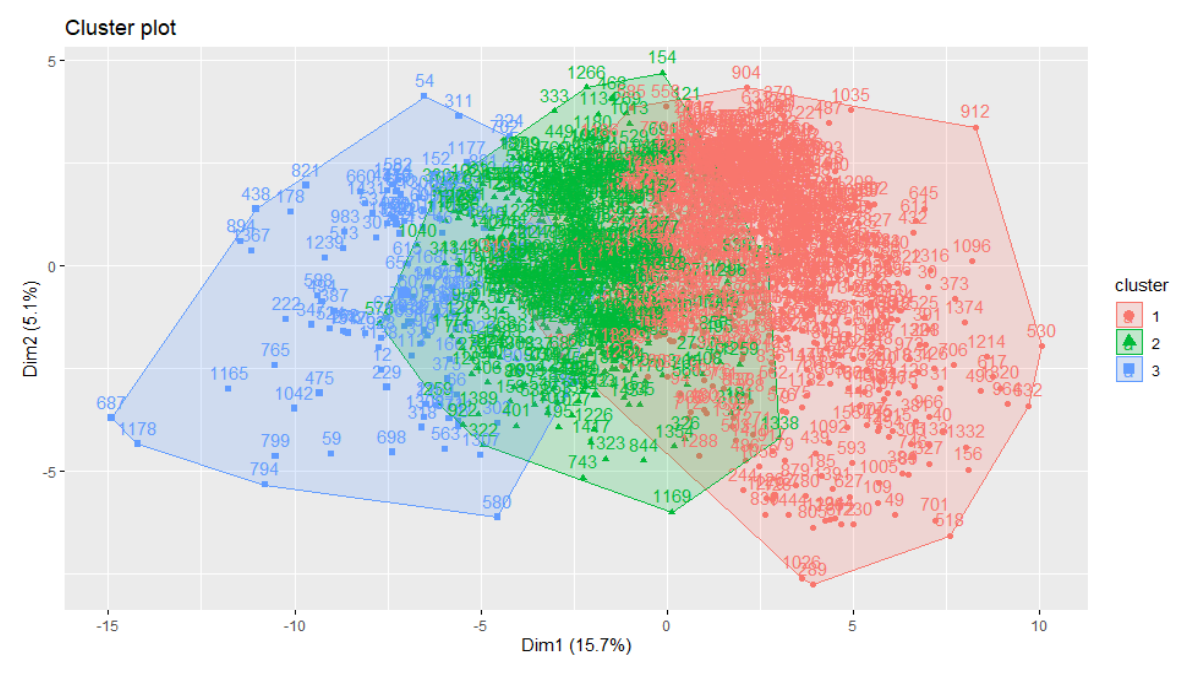

In [129]:
Image("png/4.png")

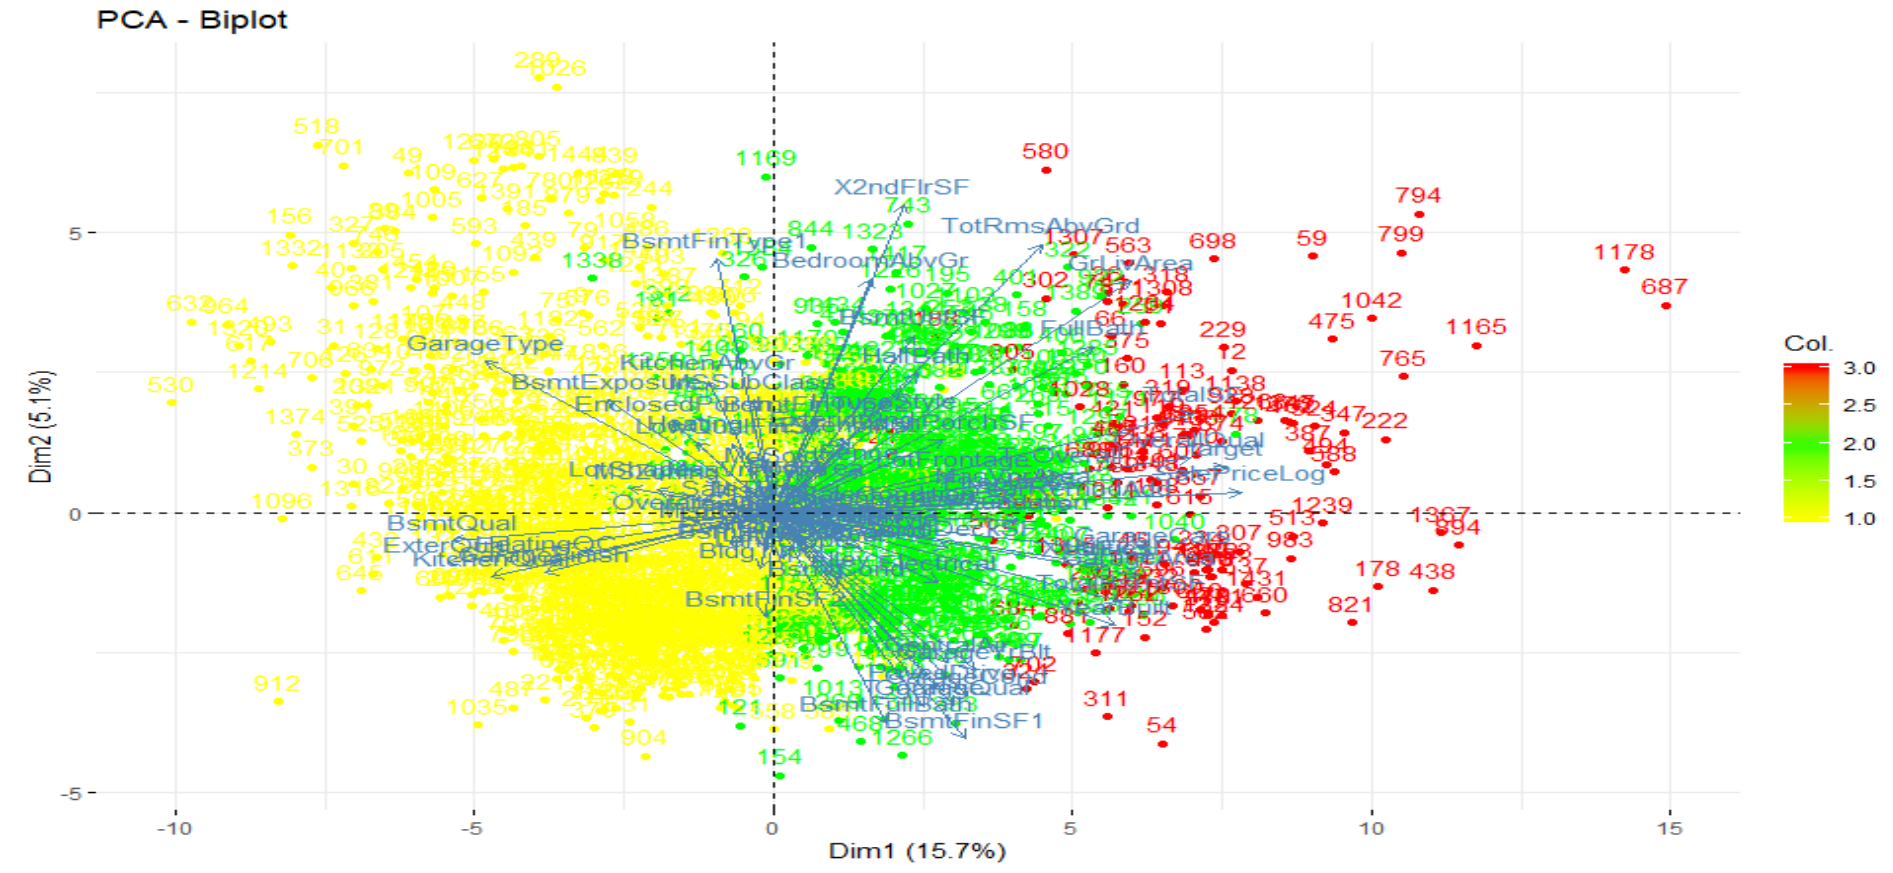

In [130]:
Image("png/5.png")

In [25]:
submission = pd.DataFrame({"Id": df_kagg['Id'],"SalePrice": np.exp(xgb_pred)})
submission.to_csv("new_kagg2.csv")

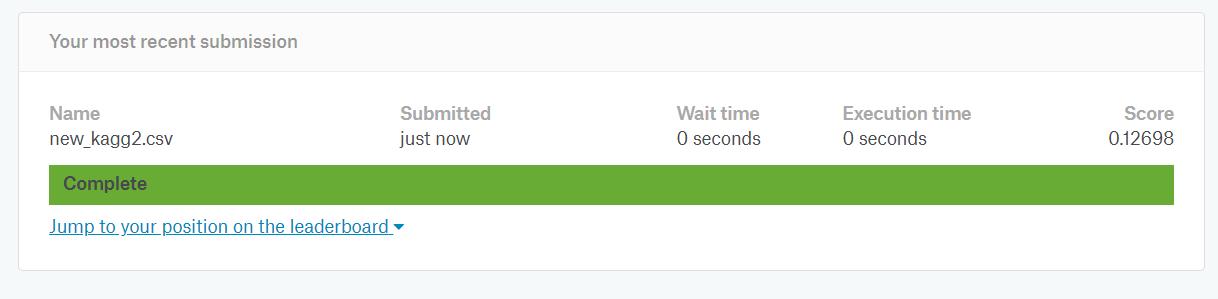

In [69]:
from IPython.display import Image
Image("png/Kagg3.png")

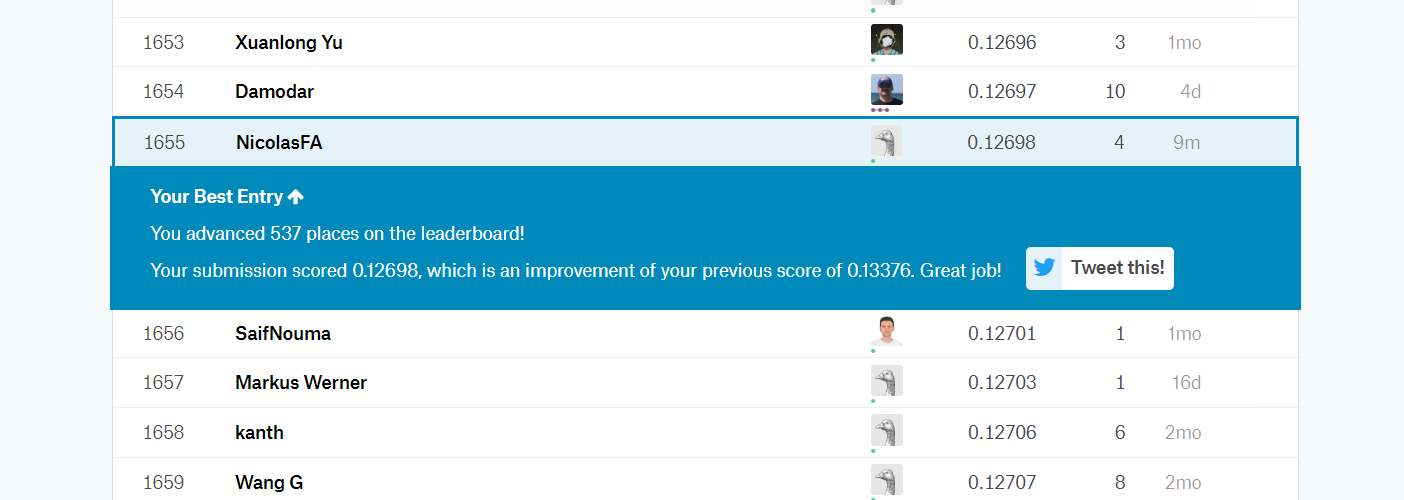

In [70]:
Image("png/idb3.png")

In [6]:
df_new.to_csv("new_Basetrain.csv")
df_kagg.to_csv("new_kaggtest.csv")

# Persévérance

In [3]:
df_new = read_csv("new_Basetrain.csv")
df_kagg = read_csv("new_kaggtest.csv")

In [4]:
df_new["T_heat"] = df_kagg["Heating"]+df_kagg["HeatingQC"]
df_new["T_Kittchen"] = df_new["KitchenAbvGr"] + df_new["KitchenQual"]
df_new["T_Condition"] = df_new["Condition1"] + df_new["Condition2"]
df_new["T_Ext"] = df_new["ExterCond"] + df_new["ExterQual"]
df_new["T_Land"] = df_new["LandContour"] + df_new["LandSlope"]
df_new["T_Roof"] = df_new["RoofMatl"] + df_new["RoofStyle"]
df_new["T_Fire"] = df_new["FireplaceQu"] + df_new["Fireplaces"]
df_new["T_Bsmt"] = df_new["BsmtCond"] + df_new["BsmtExposure"] + df_new["BsmtQual"]
df_new["T_Yearsfake"] = df_new["YearRemodAdd"]-df_new["YearBuilt"]

df_kagg["T_heat"] = df_kagg["Heating"]+df_kagg["HeatingQC"]
df_kagg["T_Kittchen"] = df_kagg["KitchenAbvGr"] + df_kagg["KitchenQual"]
df_kagg["T_Condition"] = df_kagg["Condition1"] + df_kagg["Condition2"]
df_kagg["T_Ext"] = df_kagg["ExterCond"] + df_kagg["ExterQual"]
df_kagg["T_Land"] = df_kagg["LandContour"] + df_kagg["LandSlope"]
df_kagg["T_Roof"] = df_kagg["RoofMatl"] + df_kagg["RoofStyle"]
df_kagg["T_Fire"] = df_kagg["FireplaceQu"] + df_kagg["Fireplaces"]
df_kagg["T_Bsmt"] = df_kagg["BsmtCond"] + df_kagg["BsmtExposure"] + df_kagg["BsmtQual"]
df_kagg["T_Yearsfake"] = df_kagg["YearRemodAdd"] - df_kagg["YearBuilt"]

df_new.drop(columns="PoolQC")
df_new.drop(columns="MiscFeature")
df_kagg.drop(columns="PoolQC")
df_kagg.drop(columns="MiscFeature")

df_new['SalePriceLog'] = np.log(df_new.target)

# Impact sur la target des nouvelles features

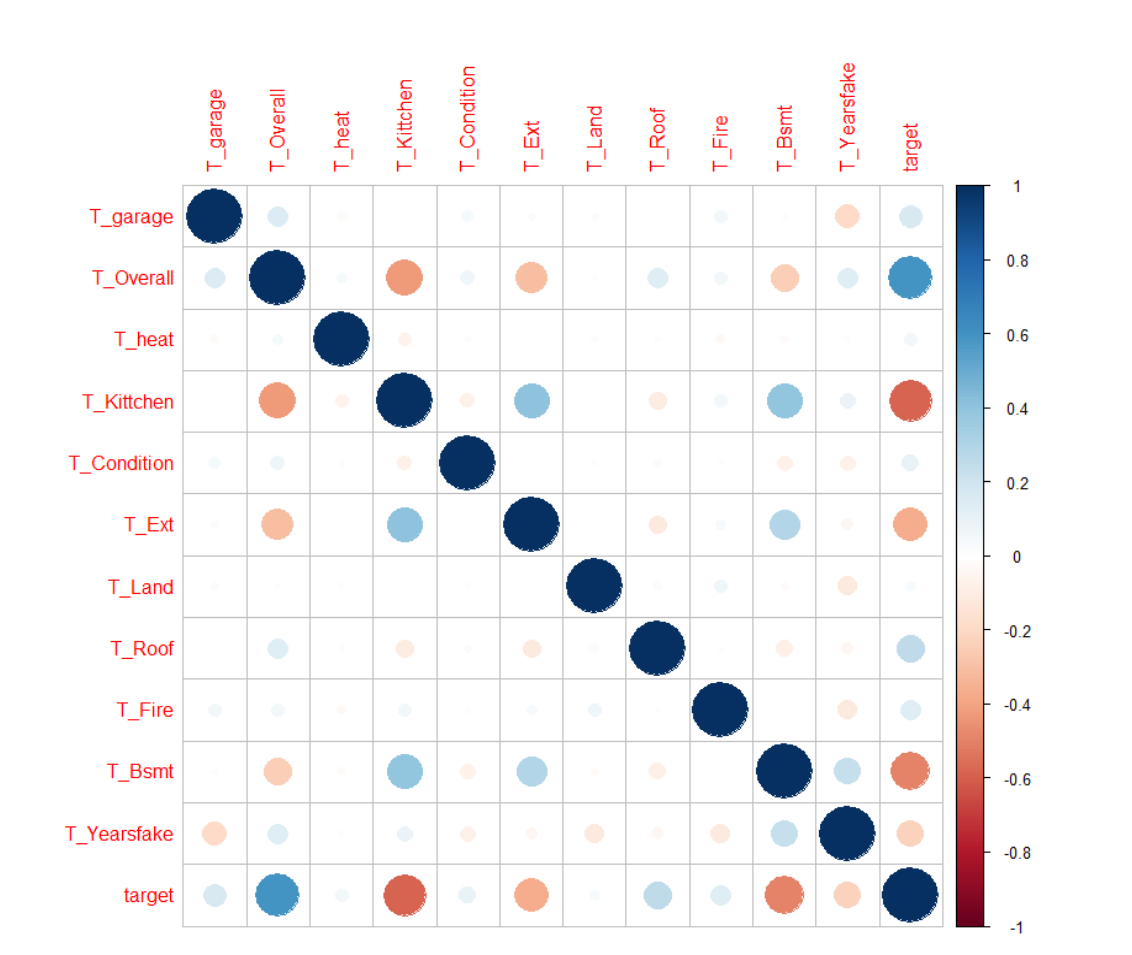

In [139]:
Image("png/6.png")

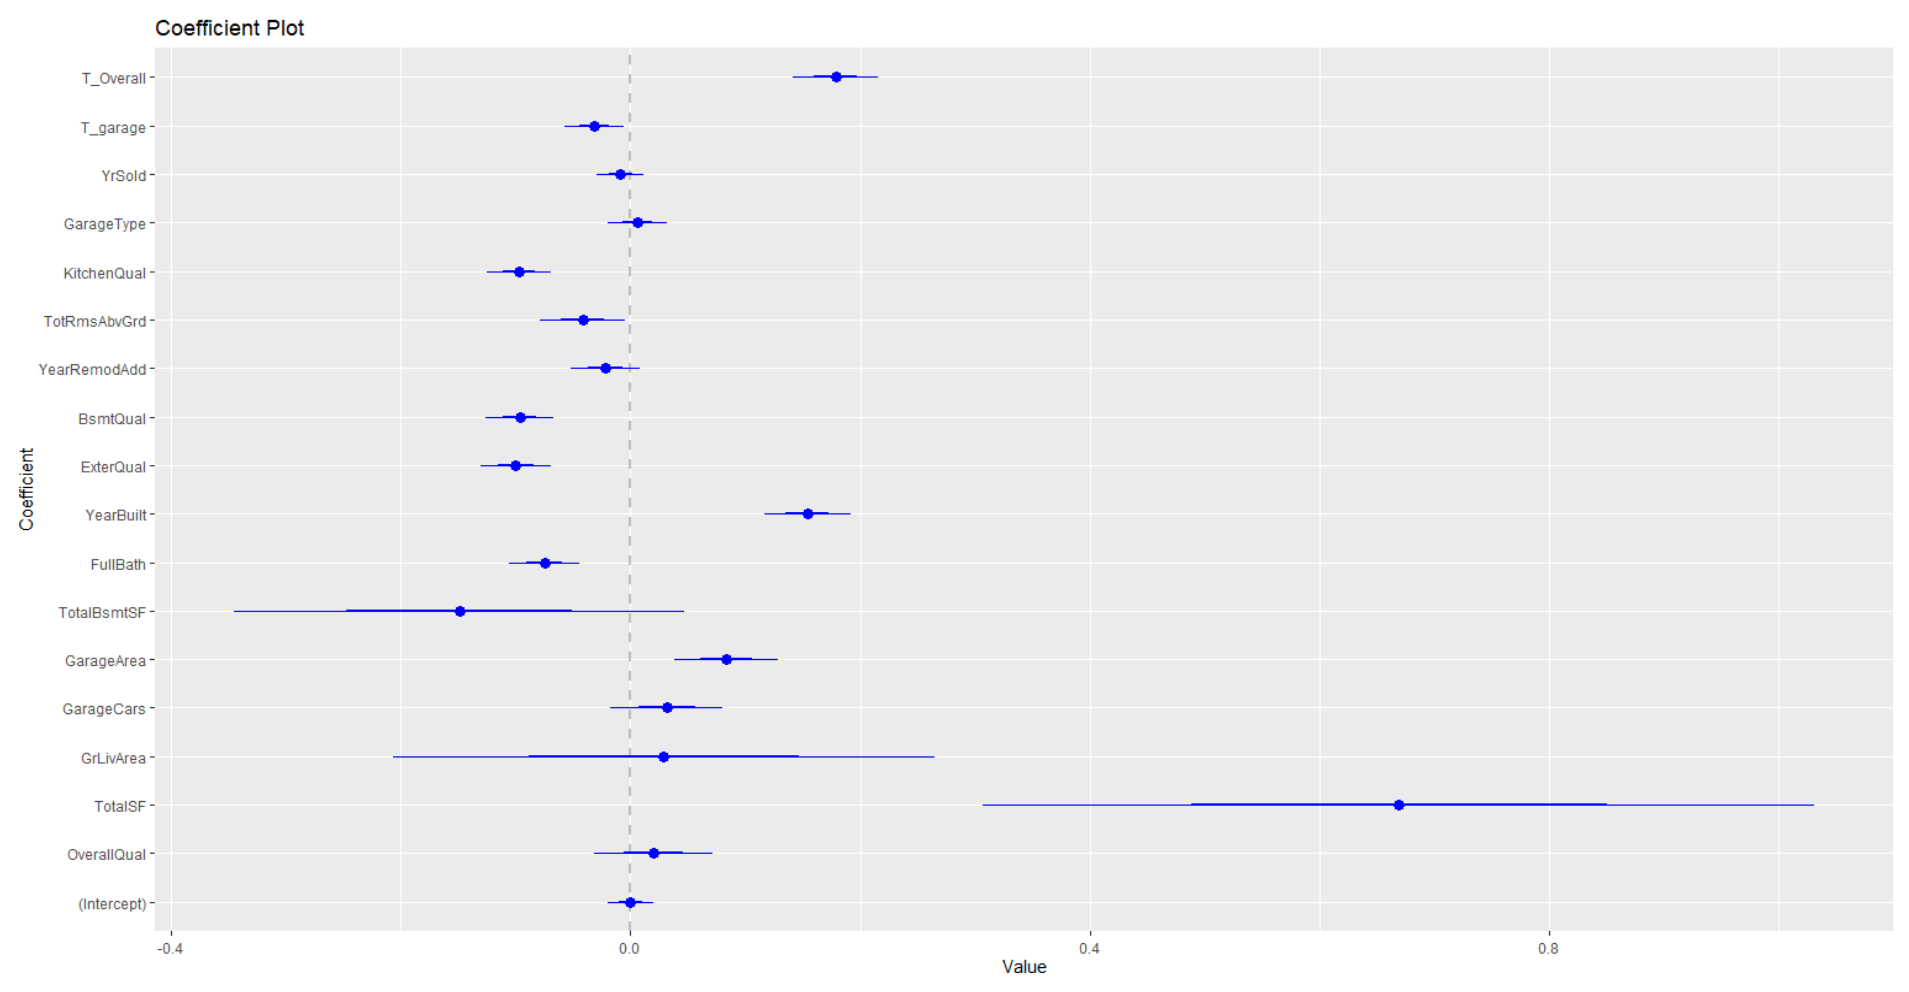

In [10]:
from IPython.display import Image
Image("png/7.png")

In [5]:
y_train = df_new.SalePriceLog.values.reshape((1453,1))
x_train = df_new.drop(['target','SalePriceLog'], axis=1)
x_test = df_kagg

In [6]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)


xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
y_test = xgb.predict(x_train)

In [7]:
RMSE = np.sqrt(mean_squared_error(y_train, y_test))
print(RMSE.round(4))

0.0375


In [8]:
submission = pd.DataFrame({"Id": df_kagg['Id'],"SalePrice": np.exp(xgb_pred)})
submission.to_csv("new_kagg4.csv")